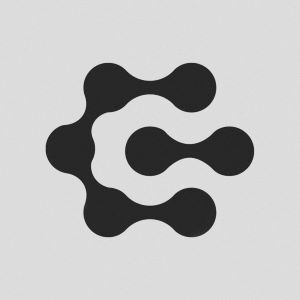

# **Importing libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

# **Data Overview.**

In [ ]:
df=pd.read_csv("/content/form final responses - Form Responses 1.csv")
df.head()

,Timestamp,Age.,Gender.,Relationship status.,Course.,CGPA.,Please select the number that best represents your current level of stress.,Please select the number that best represents your current level of depression.,Please select the number that best represents your current level of anxiety.,How do you describe your sleep quality?,Please indicate your current level of physical activity.,Please indicate your current level of social support from family and friends.,"Do you have any family members (parents, siblings, grandparents) who have been diagnosed with or experienced mental health problems?",Please indicate your current level of financial stress.,Are you happy with your study department?,Why did you choose your study department?,What is your screen time?,On what do you spend your screen time more?,From what source do you experience the most stress?,do you concentrate on your work/study while being stressed?
0,2/26/2024 1:23:45,20.0,Female.,In a Relationship.,Computer Science,3.756,4,1,2,Average.,Low.,Average.,Not sure.,1,Yes.,it was the preferred option for the majority.,10,Studies.,Studies/work.,Yes.
1,2/26/2024 1:24:53,21.0,Female.,Single.,Computer Science,3.706,5,3,5,Average.,Average.,Average.,No.,1,Yes.,Interested.,6,Social media.,Studies/work.,Yes.
2,2/26/2024 1:25:43,20.0,Female.,Single.,Computer Science,2.86,3,2,4,Average.,Average.,High.,Yes.,1,No.,it was the preferred option for the majority.,8,Social media.,Thinking about future.,No.
3,2/26/2024 1:28:32,21.0,male.,In a Relationship.,Computer Science,3.91,4,3,3,Poor.,High.,Average.,No.,3,Yes.,Interested.,6,Studies.,Thinking about future.,Yes.
4,2/26/2024 1:39:55,21.0,Female.,Single.,other,NaN,3,4,0,Average.,Average.,High.,Yes.,5,No.,Interested.,3,Other(series/movies).,Studies/work.,Yes.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 20 columns):
 #   Column                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                             183 non-null    object 
 1   Age.                                                                                                                                  183 non-null    float64
 2   Gender.                                                                                                                               183 non-null    object 
 3   Relationship status.                                                       

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age.,183.0,20.172131,1.208550,14.0,20.0,20.0,21.0,23.0
Please select the number that best represents your current level of stress.,183.0,3.207650,1.134158,0.0,3.0,3.0,4.0,5.0
Please select the number that best represents your current level of depression.,183.0,2.191257,1.343086,0.0,1.0,2.0,3.0,5.0
Please select the number that best represents your current level of anxiety.,183.0,2.759563,1.428556,0.0,2.0,3.0,4.0,5.0
Please indicate your current level of financial stress.,183.0,2.431694,1.487856,0.0,1.0,2.0,4.0,5.0
What is your screen time?,183.0,7.180328,2.177620,2.0,6.0,7.0,9.0,10.0


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Timestamp,183,182,2/26/2024 10:28:44,2
Gender.,183,2,male.,92
Relationship status.,183,3,Single.,157
Course.,183,6,Computer Science,131
CGPA.,166,93,3,11
How do you describe your sleep quality?,183,3,Average.,119
Please indicate your current level of physical activity.,183,3,Low.,88
Please indicate your current level of social support from family and friends.,182,3,Average.,93
"Do you have any family members (parents, siblings, grandparents) who have been diagnosed with or experienced mental health problems?",183,3,No.,90
Are you happy with your study department?,183,2,Yes.,147


# **Preprocessing.**

In [ ]:
df=df.drop(columns=['Timestamp'])

In [ ]:
print(df.columns)

Index(['Age.', 'Gender.', 'Relationship status.', 'Course.', 'CGPA.',
       'Please select the number that best represents your current level of stress.',
       'Please select the number that best represents your current level of depression.',
       'Please select the number that best represents your current level of anxiety.',
       'How do you describe your sleep quality?',
       'Please indicate your current level of physical activity.',
       'Please indicate your current level of social support from family and friends.',
       'Do you have any family members (parents, siblings, grandparents) who have been diagnosed with or experienced mental health problems?',
       'Please indicate your current level of financial stress.',
       'Are you happy with your study department?',
       'Why did you choose your study department?',
       'What is your screen time?',
       'On what do you spend your screen time more?',
       'From what source do you experience the most stress?

In [ ]:
new_column_names = {'Age.': 'Age',
                    'Gender.': 'Gender',
                    'Relationship status.': 'Relationship_Status',
                    'Course.':'Course',
                    'CGPA.':'CGPA',
                    'Please select the number that best represents your current level of stress.':'Stress_Level',
                    'Please select the number that best represents your current level of depression.':'Depression_Score',
                    'Please select the number that best represents your current level of anxiety.':'Anxiety_Score',
                    'How do you describe your sleep quality?':'Sleep_Quality',
                    'Please indicate your current level of physical activity.':'Physical_Activity',
                    'Please indicate your current level of social support from family and friends.':'Social_Support',
                    'Do you have any family members (parents, siblings, grandparents) who have been diagnosed with or experienced mental health problems?':'Family_History',
                    'Please indicate your current level of financial stress.':'Financial_Stress',
                    'Are you happy with your study department?':'satisfaction_with_department',
                    'Why did you choose your study department?':'reason_of_choosing_department',
                    'What is your screen time?':'screen_time',
                    'On what do you spend your screen time more?':'screen_time_on',
                    'From what source do you experience the most stress?':'stress_source',
                    'do you concentrate on your work/study while being stressed?':'concentrate_during_stress'
                   }

# Rename all columns using the dictionary
df = df.rename(columns=new_column_names)
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,satisfaction_with_department,reason_of_choosing_department,screen_time,screen_time_on,stress_source,concentrate_during_stress
0,20.0,Female.,In a Relationship.,Computer Science,3.756,4,1,2,Average.,Low.,Average.,Not sure.,1,Yes.,it was the preferred option for the majority.,10,Studies.,Studies/work.,Yes.
1,21.0,Female.,Single.,Computer Science,3.706,5,3,5,Average.,Average.,Average.,No.,1,Yes.,Interested.,6,Social media.,Studies/work.,Yes.
2,20.0,Female.,Single.,Computer Science,2.86,3,2,4,Average.,Average.,High.,Yes.,1,No.,it was the preferred option for the majority.,8,Social media.,Thinking about future.,No.
3,21.0,male.,In a Relationship.,Computer Science,3.91,4,3,3,Poor.,High.,Average.,No.,3,Yes.,Interested.,6,Studies.,Thinking about future.,Yes.
4,21.0,Female.,Single.,other,NaN,3,4,0,Average.,Average.,High.,Yes.,5,No.,Interested.,3,Other(series/movies).,Studies/work.,Yes.


In [ ]:
numeric=['Age',	'Stress_Level',	'Depression_Score',	'Anxiety_Score','Financial_Stress','screen_time']
df[numeric] = df[numeric].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            183 non-null    float64
 1   Gender                         183 non-null    object 
 2   Relationship_Status            183 non-null    object 
 3   Course                         183 non-null    object 
 4   CGPA                           166 non-null    object 
 5   Stress_Level                   183 non-null    float64
 6   Depression_Score               183 non-null    float64
 7   Anxiety_Score                  183 non-null    float64
 8   Sleep_Quality                  183 non-null    object 
 9   Physical_Activity              183 non-null    object 
 10  Social_Support                 182 non-null    object 
 11  Family_History                 183 non-null    object 
 12  Financial_Stress               183 non-null    flo

In [ ]:
df['Age'].value_counts()

20.0    74
21.0    57
19.0    21
22.0    12
18.0    12
23.0     3
20.5     1
15.0     1
14.0     1
17.0     1
Name: Age, dtype: int64

In [ ]:
incorrect_vals=[14,15,17]
df=df[~df['Age'].isin(incorrect_vals)]
df.loc[df['Age']==20.5,'Age']=20
df['Age'].value_counts()

20.0    75
21.0    57
19.0    21
22.0    12
18.0    12
23.0     3
Name: Age, dtype: int64

In [ ]:
df.shape

(180, 19)

### nulls.

searching for nulls.

In [ ]:
df.isnull().sum()

Age                               0
Gender                            0
Relationship_Status               0
Course                            0
CGPA                             16
Stress_Level                      0
Depression_Score                  0
Anxiety_Score                     0
Sleep_Quality                     0
Physical_Activity                 0
Social_Support                    1
Family_History                    0
Financial_Stress                  0
satisfaction_with_department      0
reason_of_choosing_department     0
screen_time                       0
screen_time_on                    0
stress_source                     0
concentrate_during_stress         0
dtype: int64

printing the percentage of nulls in each column.

In [ ]:
df.isnull().sum()/df.shape[0]*100

Age                              0.000000
Gender                           0.000000
Relationship_Status              0.000000
Course                           0.000000
CGPA                             8.888889
Stress_Level                     0.000000
Depression_Score                 0.000000
Anxiety_Score                    0.000000
Sleep_Quality                    0.000000
Physical_Activity                0.000000
Social_Support                   0.555556
Family_History                   0.000000
Financial_Stress                 0.000000
satisfaction_with_department     0.000000
reason_of_choosing_department    0.000000
screen_time                      0.000000
screen_time_on                   0.000000
stress_source                    0.000000
concentrate_during_stress        0.000000
dtype: float64

8.8% of the CGPA column is nulls, and o.5% of social support column.

let's begin with the CGPA column.

In [ ]:
#sorting descendingly to see the strings first.
df['CGPA'].value_counts().sort_index(ascending=False).head(10)

~3.44         1
very good     1
Good          1
Cgpa:2.032    1
C             1
B             2
3.96          1
3.94          1
3.91          1
3.88          1
Name: CGPA, dtype: int64

In [ ]:
df['CGPA'] = df['CGPA'].replace('very good', '3')
df['CGPA'] = df['CGPA'].replace('B', '3')
df['CGPA'] = df['CGPA'].replace('Good', '2')
df['CGPA'] = df['CGPA'].replace('C', '2')
df['CGPA'] = df['CGPA'].replace('~3.44', '3.44')
df['CGPA'] = df['CGPA'].replace('Cgpa:2.032', '2.032')
df['CGPA'] = df['CGPA'].replace('3.5 (current)', '3.5')
df['CGPA'].value_counts().sort_index(ascending=False).head()

3.96     1
3.94     1
3.91     1
3.88     1
3.846    1
Name: CGPA, dtype: int64

no strings now let's convert the column type to float.

In [ ]:
df['CGPA'] = df['CGPA'].astype(float)

In [ ]:
rows_with_null = df[df['CGPA'].isnull()]
# Print rows containing null values
(rows_with_null)

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,satisfaction_with_department,reason_of_choosing_department,screen_time,screen_time_on,stress_source,concentrate_during_stress
4,21.0,Female.,Single.,other,NaN,3.0,4.0,0.0,Average.,Average.,High.,Yes.,5.0,No.,Interested.,3.0,Other(series/movies).,Studies/work.,Yes.
44,21.0,Female.,In a Relationship.,Computer Science,NaN,5.0,5.0,5.0,Good.,Low.,Low.,No.,4.0,Yes.,Future scope.,10.0,Social media.,Thinking about future.,No.
49,19.0,male.,Single.,Computer Science,NaN,3.0,2.0,3.0,Good.,High.,Average.,No.,3.0,Yes.,Future scope.,7.0,Other(series/movies).,Thinking about future.,Yes.
58,22.0,male.,Single.,Computer Science,NaN,4.0,2.0,5.0,Average.,Low.,High.,Not sure.,3.0,Yes.,Interested.,8.0,Social media.,Studies/work.,Yes.
66,19.0,male.,Single.,other,NaN,3.0,4.0,5.0,Poor.,Low.,Average.,Not sure.,0.0,No.,Future scope.,8.0,Other(series/movies).,Thinking about future.,Yes.
70,21.0,male.,Single.,Engineering,NaN,4.0,4.0,3.0,Poor.,Average.,Low.,No.,0.0,Yes.,Interested.,4.0,Social media.,Studies/work.,Yes.
102,20.0,Female.,Single.,Business,NaN,2.0,2.0,2.0,Average.,High.,Average.,Not sure.,2.0,No.,it was the preferred option for the majority.,5.0,Social media.,Thinking about future.,No.
110,20.0,Female.,Single.,other,NaN,5.0,3.0,5.0,Poor.,Low.,NaN,Not sure.,2.0,Yes.,Interested.,4.0,Social media.,Thinking about future.,Yes.
116,20.0,Female.,Single.,Law,NaN,2.0,0.0,1.0,Good.,Low.,High.,No.,2.0,Yes.,Future scope.,8.0,Social media.,Health.,No.
144,21.0,Female.,In a Relationship.,Engineering,NaN,2.0,1.0,3.0,Average.,Low.,High.,No.,1.0,Yes.,Interested.,7.0,Social media.,Studies/work.,No.


In [ ]:
# Create dictionaries to store DataFrames
course_dfs = {course: df[df['Course'] == course] for course in df['Course'].unique()}

course_dfs.keys()

dict_keys(['Computer Science', 'other', 'Business', 'Medical', 'Engineering', 'Law'])

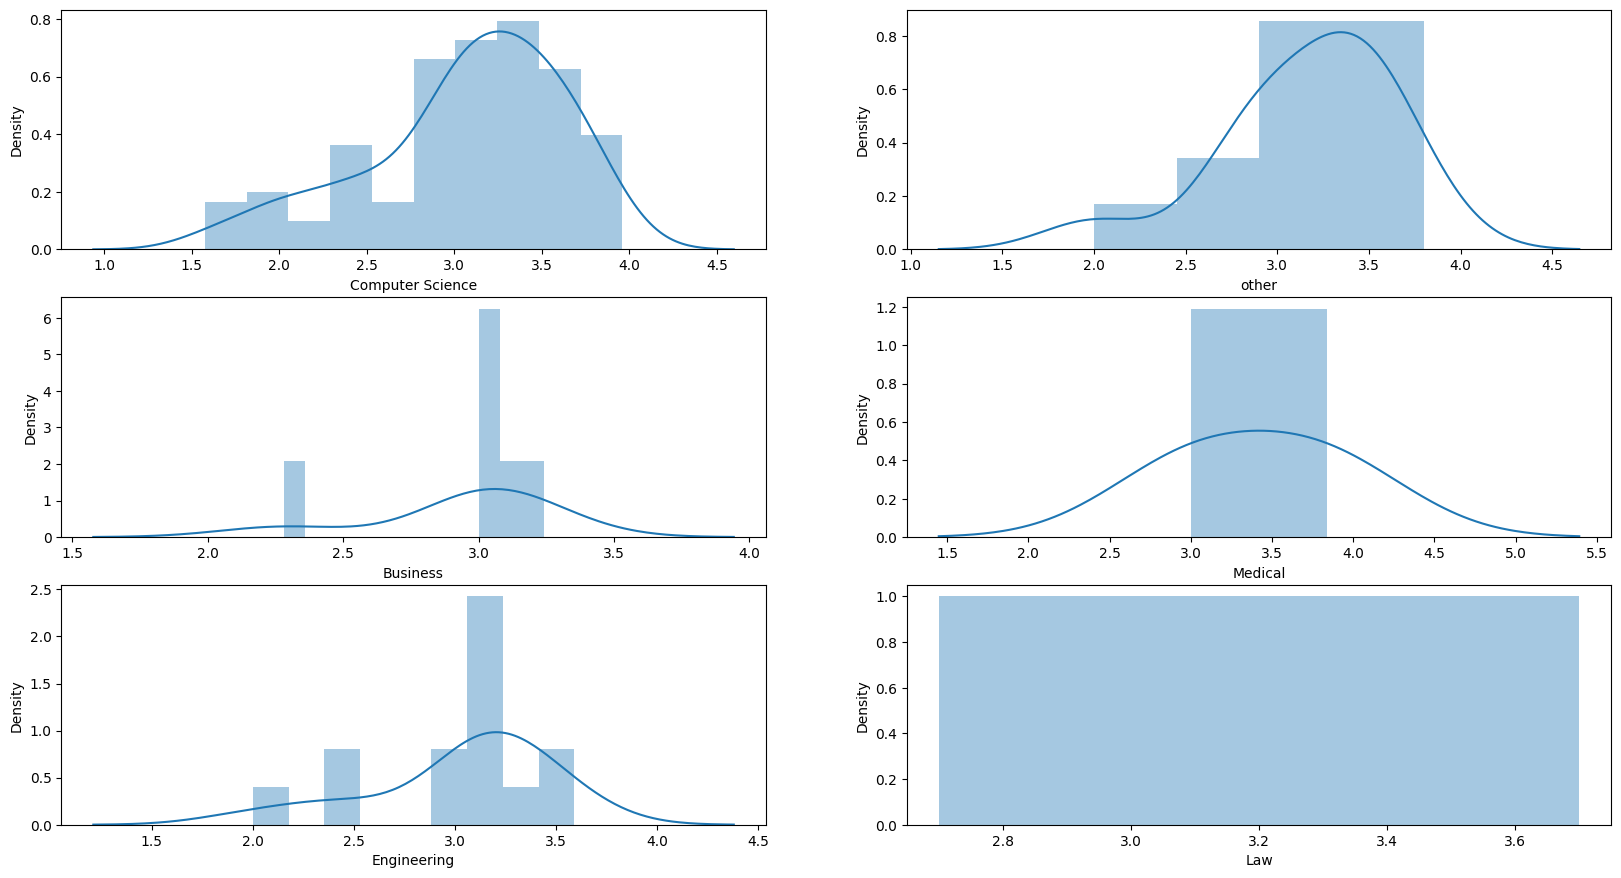

In [ ]:
plt.figure(figsize=(20,33))
for i, data in enumerate(course_dfs.keys()):
    ax = plt.subplot(9, 2, i+1)
    sns.distplot(course_dfs[data]['CGPA'], ax=ax)
    plt.xlabel(data)

plt.show()

It obvious that the cgpa for all the majors is nearly normally distributed, so the best approach is the to impute the nulls for every major with the mean of each distributions.

In [ ]:
computer_science_median = course_dfs['Computer Science']['CGPA'].median()
others_median = course_dfs['other']['CGPA'].median()
business_median = course_dfs['Business']['CGPA'].median()
medical_median = course_dfs['Medical']['CGPA'].median()
eng_median = course_dfs['Engineering']['CGPA'].median()
law_median = course_dfs['Law']['CGPA'].median()

In [ ]:
print("Computer Science median CGPA: ",computer_science_median)
print("Others median CGPA: ",others_median)
print("Business median CGPA: ",business_median)
print("Medical median CGPA: ",medical_median)
print("Engineering median CGPA: ",eng_median)
print("Law median CGPA: ",law_median)

Computer Science median CGPA:  3.14
Others median CGPA:  3.29
Business median CGPA:  3.0
Medical median CGPA:  3.42
Engineering median CGPA:  3.165
Law median CGPA:  3.2


In [ ]:
course_means = {'Computer Science': computer_science_median, 'Business': business_median, 'Medical': medical_median, 'Engineering': eng_median, 'Law': law_median,'other': others_median}
df['CGPA'].fillna(df['Course'].map(course_means), inplace=True)
df['CGPA'].isnull().sum()

0

We can see our previous values is placed but the median of every major.

In [ ]:
df[df['Social_Support'].isnull()]

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,satisfaction_with_department,reason_of_choosing_department,screen_time,screen_time_on,stress_source,concentrate_during_stress
110,20.0,Female.,Single.,other,3.29,5.0,3.0,5.0,Poor.,Low.,NaN,Not sure.,2.0,Yes.,Interested.,4.0,Social media.,Thinking about future.,Yes.


according to the other columns, it looks like this person doesn't have any social support so let's replace it with the lowest value.

In [ ]:
df['Social_Support'].value_counts()

Average.    93
High.       57
Low.        29
Name: Social_Support, dtype: int64

In [ ]:
df.loc[df['Social_Support'].isnull(),'Social_Support']='Low.'

In [ ]:
df.isnull().sum()

Age                              0
Gender                           0
Relationship_Status              0
Course                           0
CGPA                             0
Stress_Level                     0
Depression_Score                 0
Anxiety_Score                    0
Sleep_Quality                    0
Physical_Activity                0
Social_Support                   0
Family_History                   0
Financial_Stress                 0
satisfaction_with_department     0
reason_of_choosing_department    0
screen_time                      0
screen_time_on                   0
stress_source                    0
concentrate_during_stress        0
dtype: int64

as we can see there is no longer any nulls in our columns.

### checking for datatypes

In [ ]:
for col in df.columns:
    # Check if the column contains string values
    if df[col].dtype == 'object':
        # Remove the dot character from string values
        df[col] = df[col].str.replace('.', '')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            180 non-null    float64
 1   Gender                         180 non-null    object 
 2   Relationship_Status            180 non-null    object 
 3   Course                         180 non-null    object 
 4   CGPA                           180 non-null    float64
 5   Stress_Level                   180 non-null    float64
 6   Depression_Score               180 non-null    float64
 7   Anxiety_Score                  180 non-null    float64
 8   Sleep_Quality                  180 non-null    object 
 9   Physical_Activity              180 non-null    object 
 10  Social_Support                 180 non-null    object 
 11  Family_History                 180 non-null    object 
 12  Financial_Stress               180 non-null    flo

In [ ]:
df["Stress_Level"].value_counts()

3.0    63
4.0    51
2.0    28
5.0    23
1.0    13
0.0     2
Name: Stress_Level, dtype: int64

In [ ]:
df["Depression_Score"].value_counts()

1.0    51
3.0    43
2.0    38
4.0    24
0.0    15
5.0     9
Name: Depression_Score, dtype: int64

In [ ]:
df["Anxiety_Score"].value_counts()

3.0    50
2.0    34
4.0    30
1.0    30
5.0    26
0.0    10
Name: Anxiety_Score, dtype: int64

In [ ]:
df["Age"].value_counts()

20.0    75
21.0    57
19.0    21
22.0    12
18.0    12
23.0     3
Name: Age, dtype: int64

In [ ]:
df["Course"].value_counts()

Computer Science    130
other                17
Engineering          16
Business              9
Medical               4
Law                   4
Name: Course, dtype: int64

In [ ]:
df["Sleep_Quality"].value_counts()

Average    117
Poor        35
Good        28
Name: Sleep_Quality, dtype: int64

In [ ]:
df["Physical_Activity"].value_counts()

Low        87
Average    69
High       24
Name: Physical_Activity, dtype: int64

In [ ]:
df["Social_Support"].value_counts()

Average    93
High       57
Low        30
Name: Social_Support, dtype: int64

In [ ]:
df["Family_History"].value_counts()

No          90
Not sure    50
Yes         40
Name: Family_History, dtype: int64

In [ ]:
df["Financial_Stress"].value_counts()

2.0    43
4.0    37
3.0    34
1.0    30
0.0    21
5.0    15
Name: Financial_Stress, dtype: int64

In [ ]:
df["satisfaction_with_department"].value_counts()

Yes    145
No      35
Name: satisfaction_with_department, dtype: int64

In [ ]:
df["reason_of_choosing_department"].value_counts()

Interested                                      89
Future scope                                    62
it was the preferred option for the majority    27
Family pressure                                  2
Name: reason_of_choosing_department, dtype: int64

In [ ]:
df["screen_time"].value_counts()

10.0    38
8.0     32
7.0     30
6.0     24
9.0     16
5.0     15
4.0     13
3.0      8
2.0      4
Name: screen_time, dtype: int64

In [ ]:
df["screen_time_on"].value_counts()

Social media            107
Studies                  38
Other(series/movies)     25
Video games              10
Name: screen_time_on, dtype: int64

In [ ]:
df["stress_source"].value_counts()

Thinking about future    89
Studies/work             72
Family                   14
Health                    4
No stress                 1
Name: stress_source, dtype: int64

In [ ]:
df["concentrate_during_stress"].value_counts()

Yes          115
No            62
No stress      3
Name: concentrate_during_stress, dtype: int64

**Changed datatype of the following columns:**

1.   Stress_Level
2.   Depression_Score
3.   Anxiety_Score
4.   Financial_Stress
5.   Screen_time
6.   Age




In [ ]:
df["Stress_Level"] = df["Stress_Level"].astype(int)
df["Depression_Score"] = df["Depression_Score"].astype(int)
df["Anxiety_Score"] = df["Anxiety_Score"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Financial_Stress"] = df["Financial_Stress"].astype(int)
df["screen_time"] = df["screen_time"].astype(int)

# **Data Analysis.**

<Axes: xlabel='Age', ylabel='Count'>

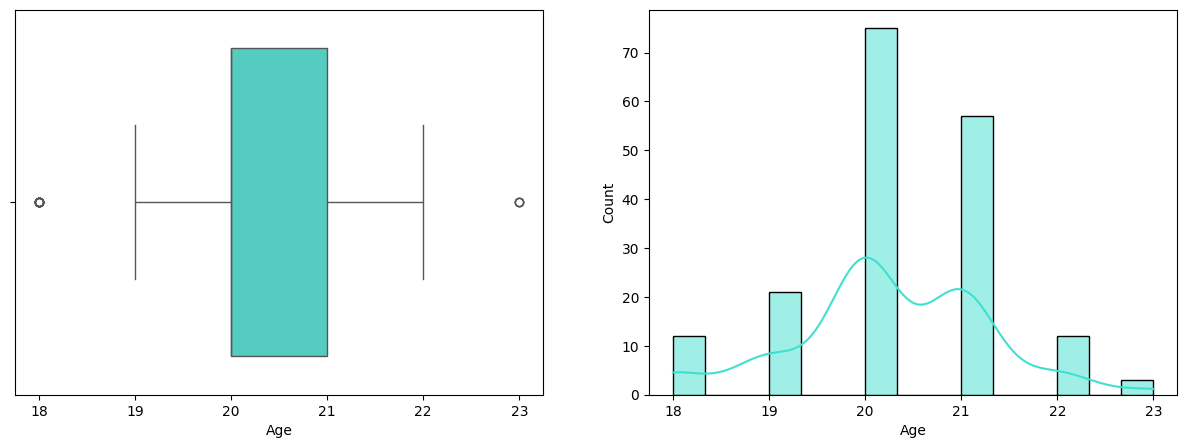

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Age'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['Age'], kde=True,color='turquoise')

we can see that the outliers in the age column are logical, since there can be students in the age of 18 and 23 so, we will not drop them, also the distribution is not skewed, and most of the students are 20 years old.

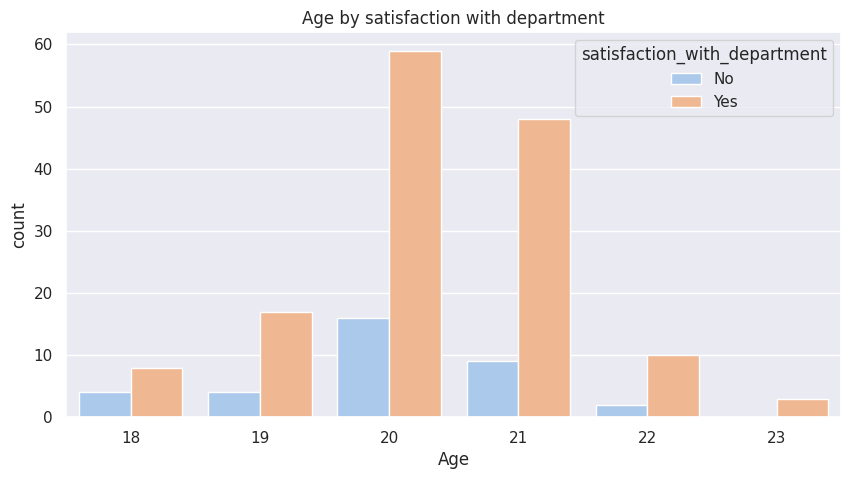

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Age'],hue=df['satisfaction_with_department'],palette='pastel')
plt.title("Age by satisfaction with department")
plt.show()

from the prev. plot, we can notice that as the age increases the proportion of 'No' decreases with respect to 'Yes'..for example, students who are 18 years old 1/3 of them is not satisfied with there study departments, but who have 19 years old nearly 1/5 of them is not satisfied, and so on.
conclusion : students at their first years in college can think that they don't like their study department because it's something new for them.

In [ ]:
fig = px.pie(df, names='Gender', title='Gender Distribution',
             color='Gender',
            color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

we can see that the gender column is balanced.

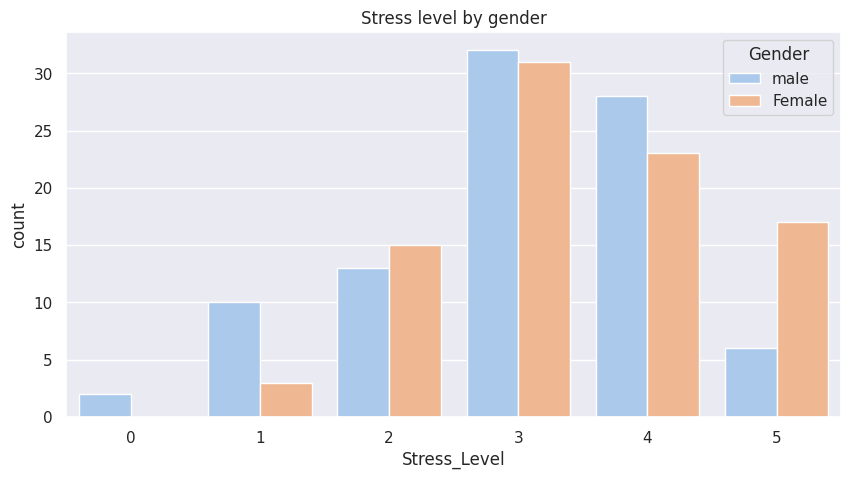

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Stress_Level'],hue=df['Gender'],palette='pastel')
plt.title("Stress level by gender")
plt.show()

we can notice from the prev. plot that most of students that experience low levels of stress(0,1) are males, and most of students that experience the highest level of stress(5) are females, but in the intermediate levels they are nearly similar.

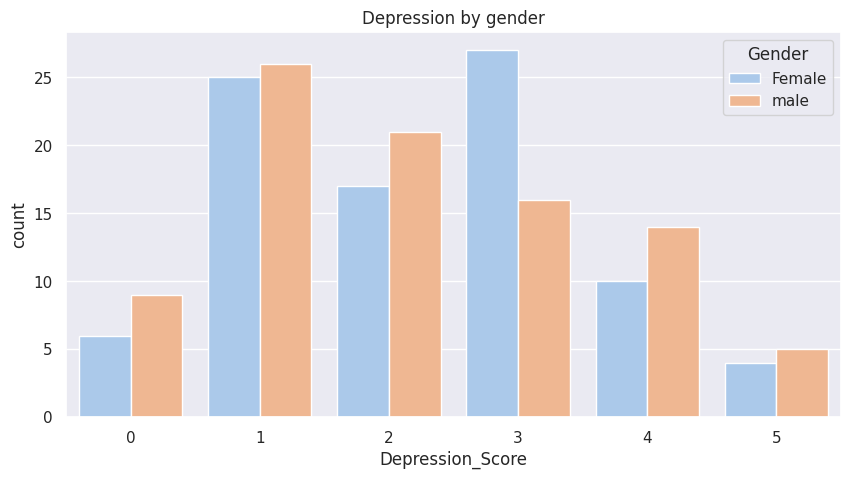

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Depression_Score'],hue=df['Gender'],palette='pastel')
plt.title("Depression by gender")
plt.show()

from the prev. plot we can see that depression is not related much to the gender of the student.

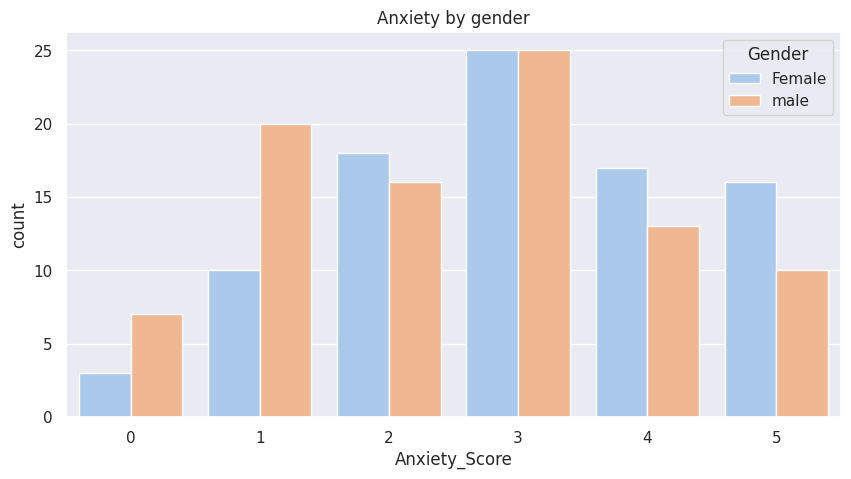

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Anxiety_Score'],hue=df['Gender'],palette='pastel')
plt.title("Anxiety by gender")
plt.show()

we can notice from the prev. plot that as the anxiety score increases the proportion of males with respect to the females increases..this means that students with high anxiety have a higher propapility of being females.

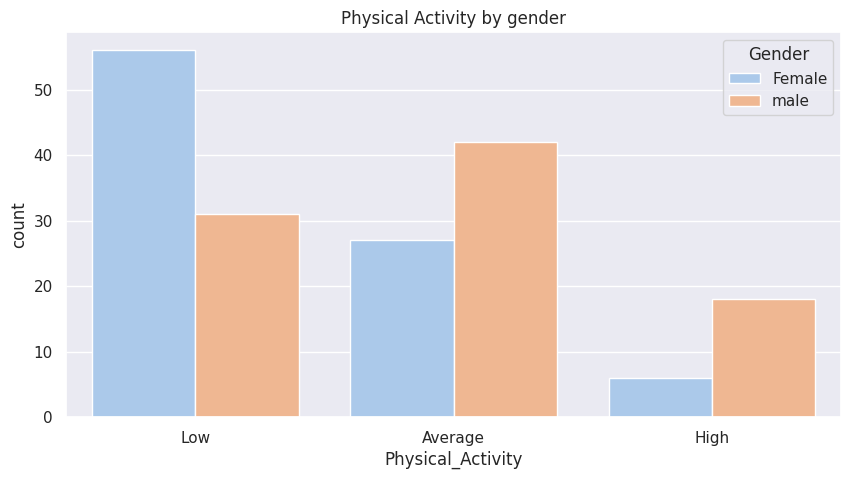

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Physical_Activity'],hue=df['Gender'],palette='pastel')
plt.title("Physical Activity by gender")
plt.show()

from the prev. plot, we can see that males tend to have higher physical activity than females, and that's normal since males goes to gym more than females.

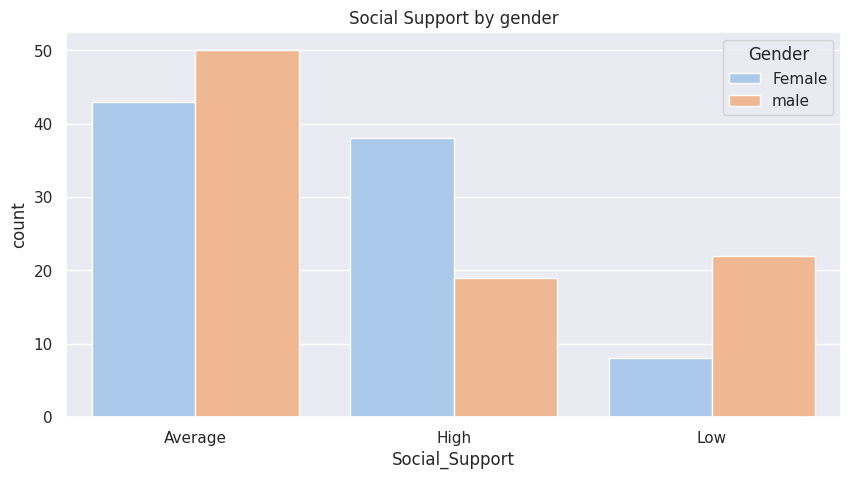

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Social_Support'],hue=df['Gender'],palette='pastel')
plt.title("Social Support by gender")
plt.show()

we can observe from the plot that males tend to have low social support more than females.

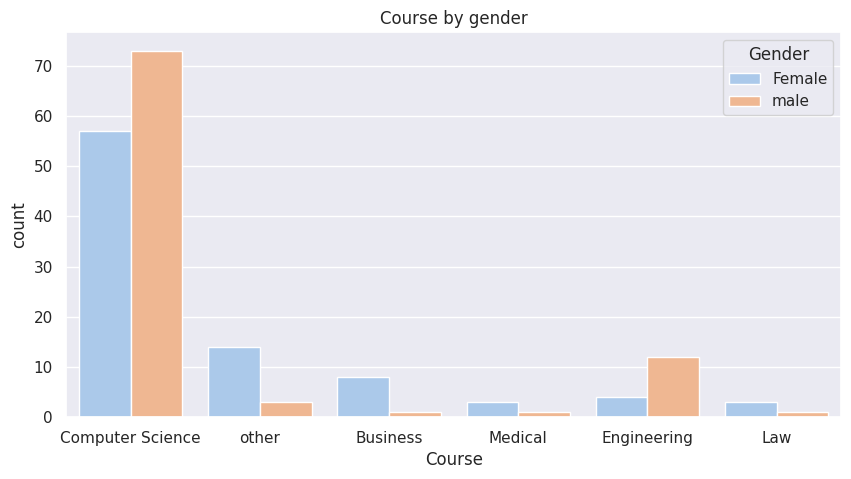

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Course'],hue=df['Gender'],palette='pastel')
plt.title("Course by gender")
plt.show()

we can see that males tend to be studying engineering or computer science.

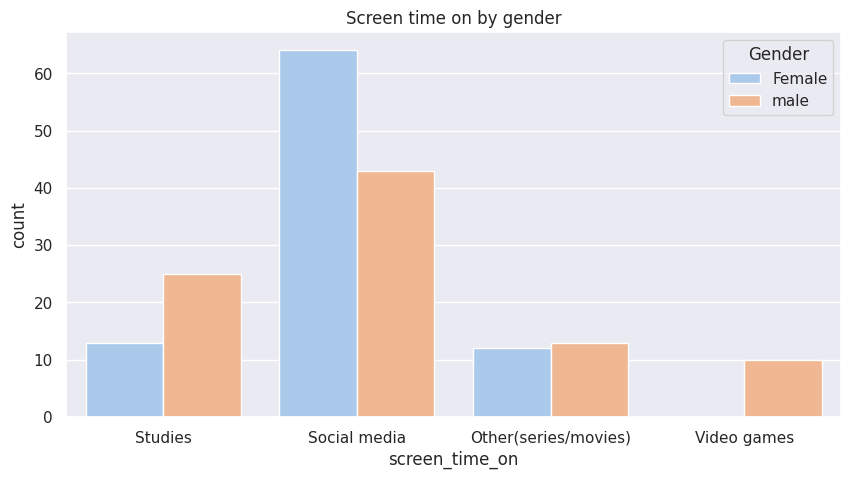

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['screen_time_on'],hue=df['Gender'],palette='pastel')
plt.title("Screen time on by gender")
plt.show()

we can notice from the prev. plot that only males spend their screen time on videos games from our students, and females tend to spend their screen time on social media more than males.///males take more time on studying.

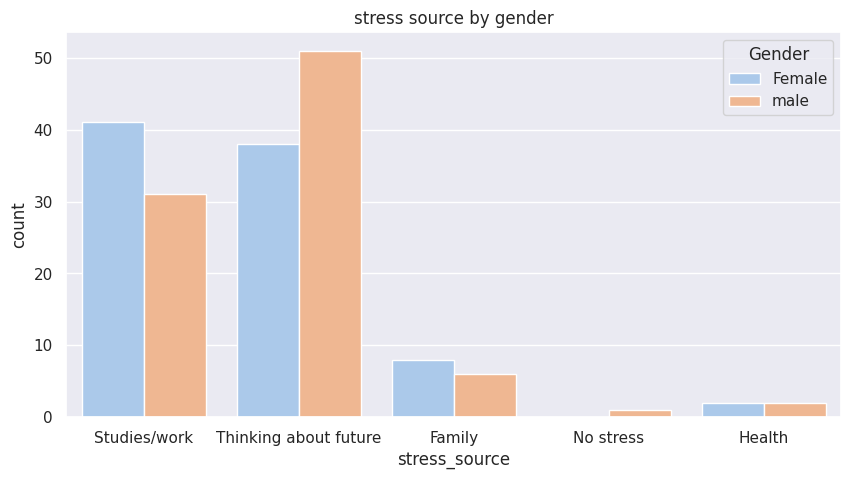

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['stress_source'],hue=df['Gender'],palette='pastel')
plt.title("stress source by gender")
plt.show()

we can see from the prev. plot that most of our students tend to suffer from stress because of thinking about the future or studies and work, and males tend more to stress because of thinking about the future and that might be because of worrying about a good job and money for marriage and future.

In [ ]:
fig = px.pie(df, names='Relationship_Status', title='Relationship Status Distribution',
             color='Relationship_Status',
            color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

In [ ]:
relationship_status_with_CGPA = df.groupby('Relationship_Status')['CGPA'].mean().reset_index()
fig = px.bar(relationship_status_with_CGPA, x='CGPA', y='Relationship_Status', orientation='h',
             title='Relationship status against mean of CGPA',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

we can see from the prev. plot that the mean of the CGPA of married students is lower than the rest of students and this must be because distractions, and responsibilities that face married people, and we can also see that students who are in a relationship have slightly higher GPAs than single students.

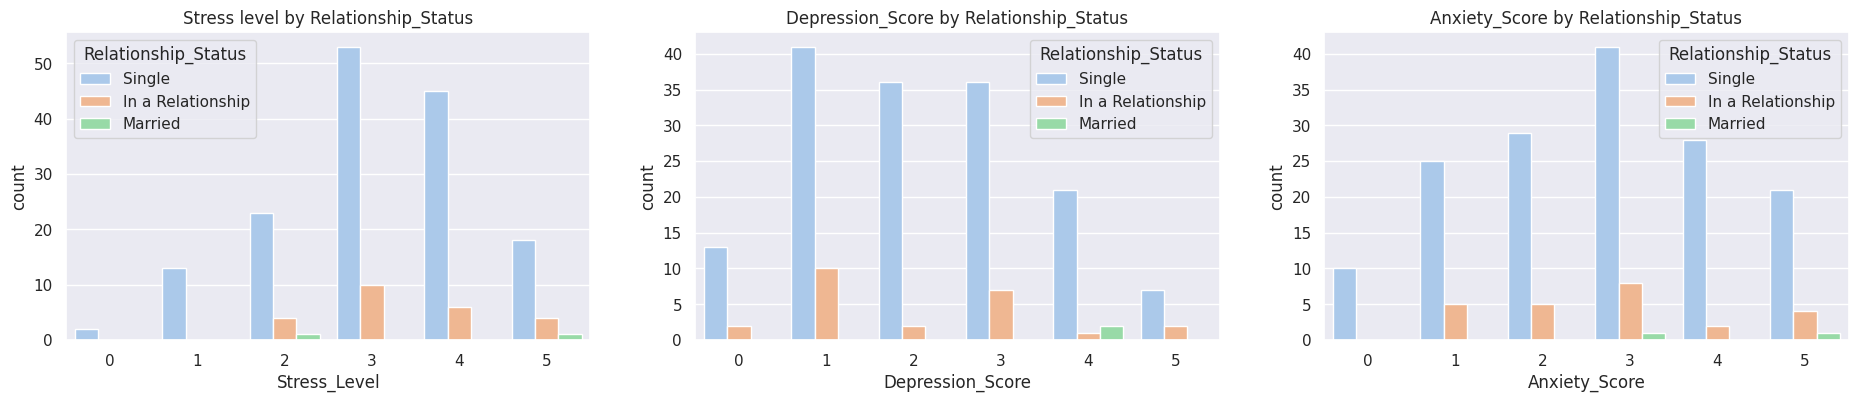

In [ ]:
plt.figure(figsize=(23,4))
sns.set_theme(style="darkgrid")
plt.subplot(1, 3, 1)
sns.countplot(x = df['Stress_Level'],hue=df['Relationship_Status'],palette='pastel')
plt.title("Stress level by Relationship_Status")
plt.subplot(1, 3, 2)
sns.countplot(x = df['Depression_Score'],hue=df['Relationship_Status'],palette='pastel')
plt.title("Depression_Score by Relationship_Status")
plt.subplot(1, 3, 3)
sns.countplot(x = df['Anxiety_Score'],hue=df['Relationship_Status'],palette='pastel')
plt.title("Anxiety_Score by Relationship_Status")
plt.show()



*   from the first plot we can see that students who are in a relationship suffer from 2 or above stress level, and single students can suffer from all levels of stress and their ditribution is near normal.
*   from the second plot we can see that depression is not affected much by being single or in a relationship, but we can also notice that all married students suffer from level 4 depression which is a little high.

*   from the third plot we can notice that students who are in a relationship suffer from anxiety starting from level 1, but single students' anxiety levels is nearly normally distributed, but anxiety level has no relationship with being married.





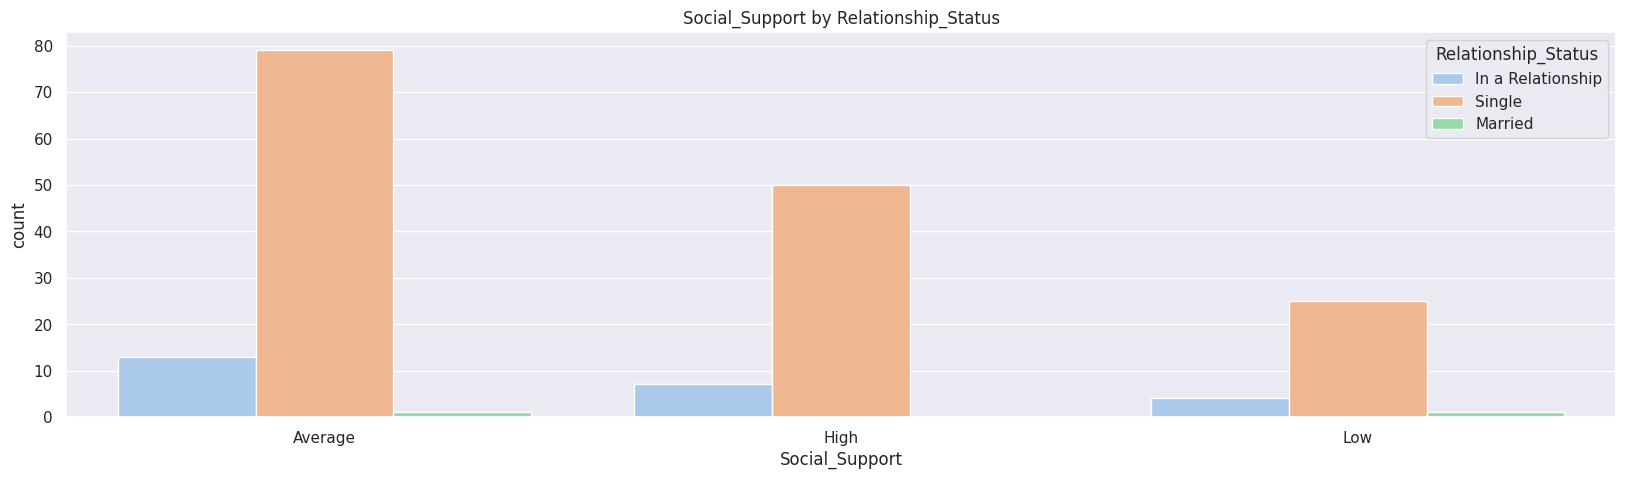

In [ ]:
plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Social_Support'],hue=df['Relationship_Status'],palette='pastel')
plt.title("Social_Support by Relationship_Status")
plt.show()

from the prev. plot we can see that the relationship status doesn't affect much the social support and this is unexpected, but from the plots we can see that the proportion between the classes of the relationship status in all levels of support is nearly the same, and married students only experience low or average support.

In [ ]:
fig = px.histogram(df, x='Course', color='Course', title='Distribution of Courses',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

most of our data are computer science students.

In [ ]:
avg_stress_per_course = df.groupby('Course')['Stress_Level'].mean().reset_index().sort_values(by='Stress_Level',ascending=False)
top_stressed_courses = avg_stress_per_course.sort_values(by='Stress_Level').head(10)


fig = px.bar(top_stressed_courses, x='Stress_Level', y='Course', orientation='h',
             title='Top Highest Stressed Courses', labels={'Stress_Level': 'Average Stress Level', 'Course': 'Course'},color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
avg_CGPA_per_course = df.groupby('Course')['CGPA'].mean().reset_index().sort_values(by='CGPA',ascending=False)
top_CGPA_courses = avg_CGPA_per_course.sort_values(by='CGPA').head(10)


fig = px.bar(top_CGPA_courses, x='CGPA', y='Course', orientation='h',
             title='Top Highest CGPA Courses', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

We can infer from this plot, and the one before it, that there is a high correlation between the high stress level and low CGPA for Business students.

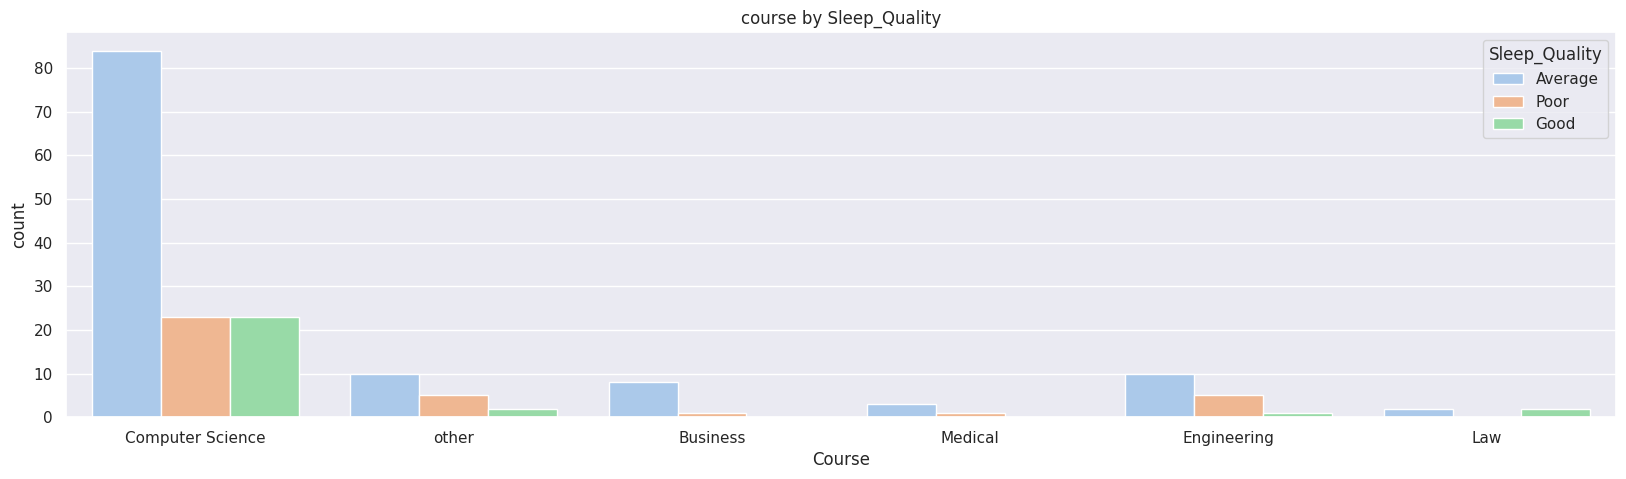

In [ ]:
plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Course'],hue=df['Sleep_Quality'],palette='pastel')
plt.title("course by Sleep_Quality")
plt.show()

We can infer from this plot, that Computer Science , Engineering and Business most dominant the Average Sleep_quality
also, Medical and Business with no Good Sleep_quality this refers to their Hard track.

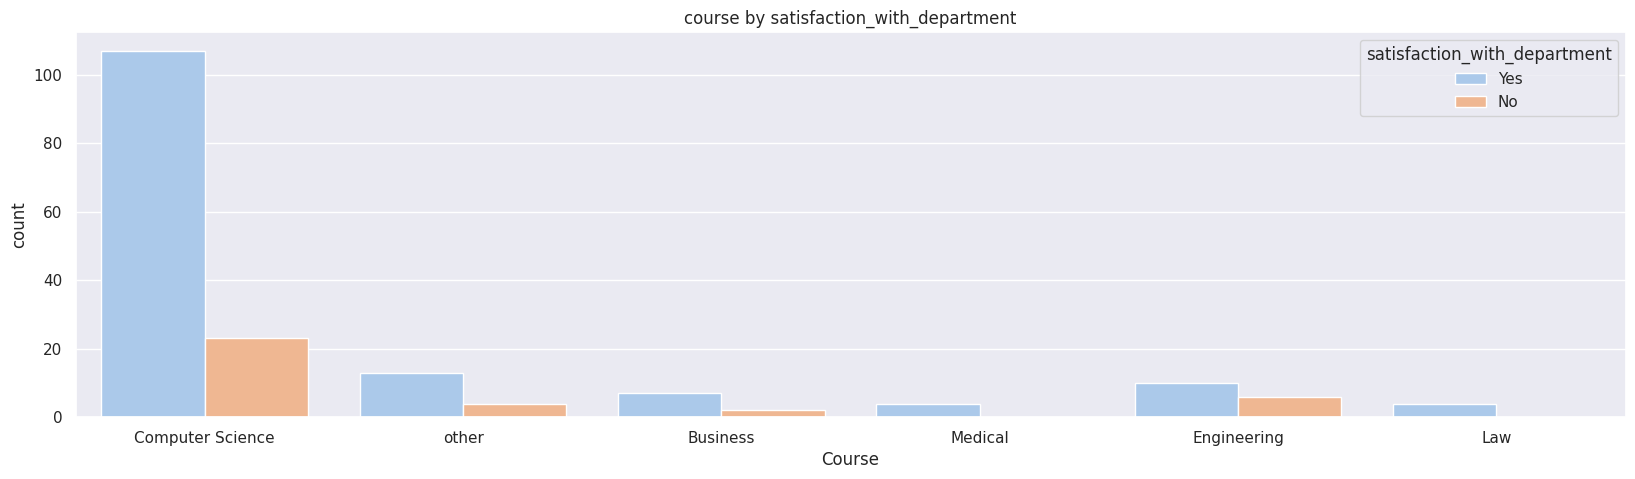

In [ ]:
plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Course'],hue=df['satisfaction_with_department'],palette='pastel')
plt.title("course by satisfaction_with_department")
plt.show()

* the ratio between yes to no in computer science is high, and about 20% of
computer science students are not satisfied with their departments. this refer to that most of computer science students are satisfied with their department .
* for engineering ratio between yes to no is nearly close this refer that nearly 40% of students in engineering track are not satisfied with their department.
* we can also notice that all of the students in law and medical feilds are satisfied with their department.

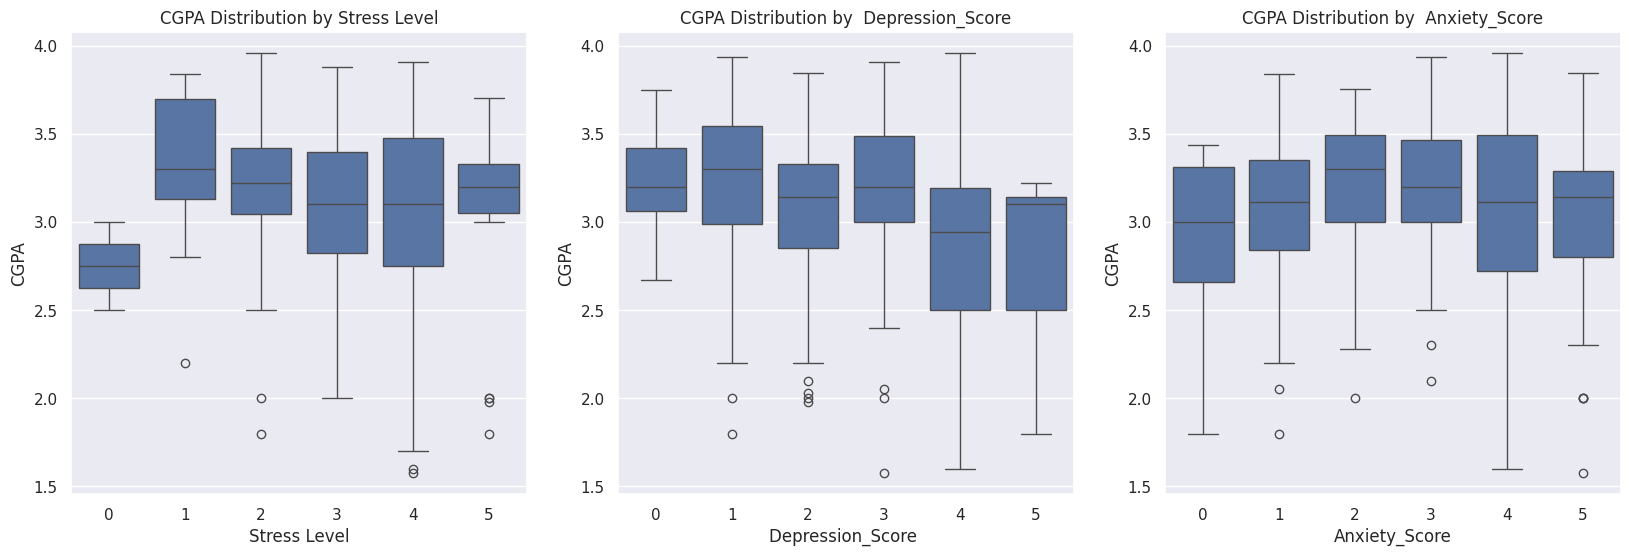

In [ ]:
# Create a box plot for each stress level
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)

sns.boxplot(data=df, x='Stress_Level', y='CGPA')

# Set the title and labels
plt.title('CGPA Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Depression_Score', y='CGPA')

# Set the title and labels
plt.title('CGPA Distribution by  Depression_Score')
plt.xlabel('Depression_Score ')
plt.ylabel('CGPA')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Anxiety_Score', y='CGPA')

# Set the title and labels
plt.title('CGPA Distribution by  Anxiety_Score')
plt.xlabel('Anxiety_Score')
plt.ylabel('CGPA')

# Show the plot
plt.show()



1.   **Stress_level and CGPA** :
      
      from the prev. plot we can see that the higher sterss level higher CGPA , this come from the more you study hard the more you get stressed , as we see the Q2 of stress level (1,2,3,4,5)
      almost is 3.3 , And Q2 of stress level (0) is 2.75
2.   **depression_score and CGPA** :
      from the prev. plot we can see that the higher depression_score lower CGPA , this come from that the depressed person can not make good effort to get higher CGPA , as we see depression_score (4,5) with poor Q1 less than the other levels (0,1,2,3)
3.   **Anxiety_Score and CGPA** :
      we can't see a noticable difference between the different levels of anxiety, so we can conclude that anxiety doesn't affect the performance off students.




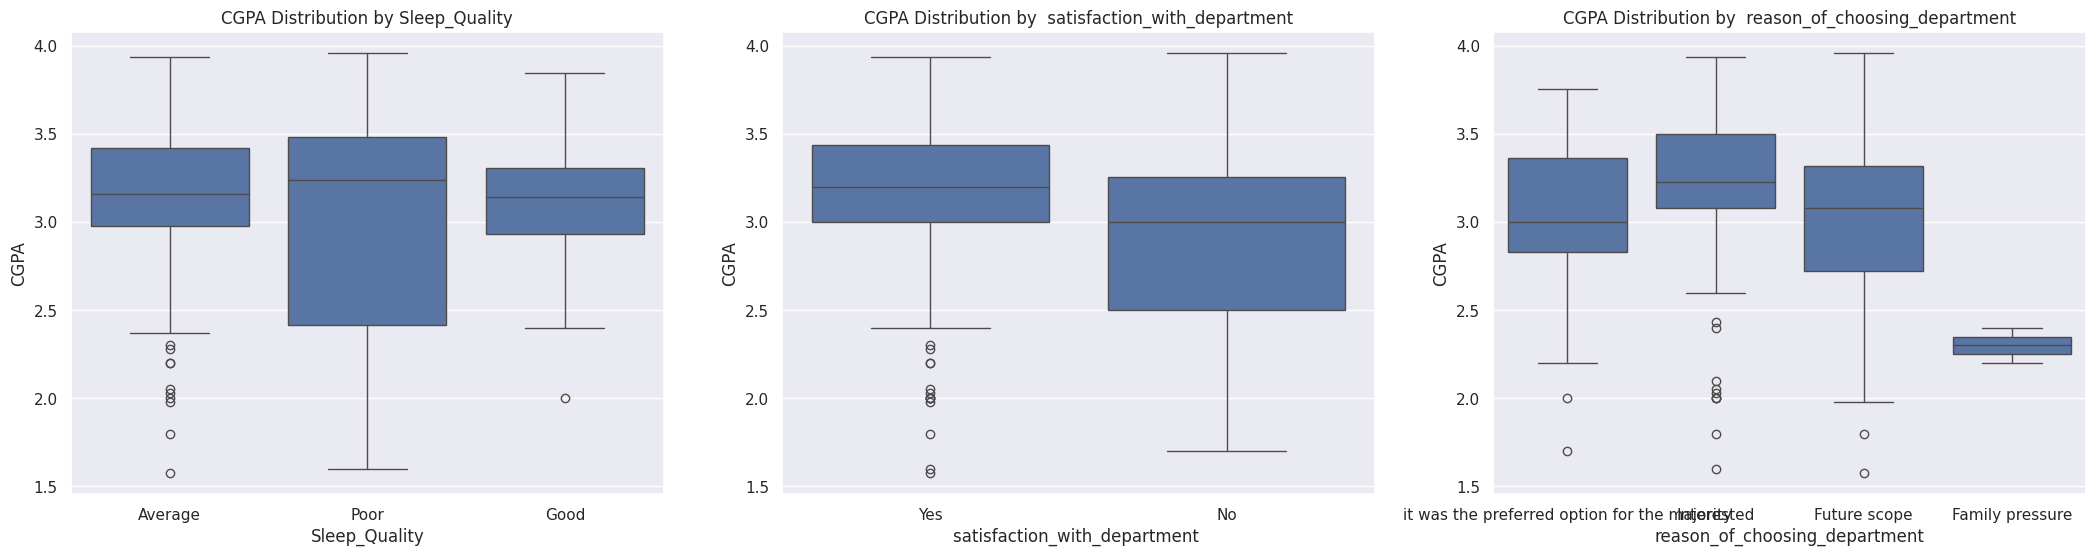

In [ ]:
# Create a box plot for each stress level
plt.figure(figsize=(26, 6))
plt.subplot(1, 3, 1)

sns.boxplot(data=df, x='Sleep_Quality', y='CGPA')

# Set the title and labels
plt.title('CGPA Distribution by Sleep_Quality')
plt.xlabel('Sleep_Quality')
plt.ylabel('CGPA')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='satisfaction_with_department', y='CGPA')

# Set the title and labels
plt.title('CGPA Distribution by  satisfaction_with_department')
plt.xlabel('satisfaction_with_department ')
plt.ylabel('CGPA')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='reason_of_choosing_department', y='CGPA')

# Set the title and labels
plt.title('CGPA Distribution by  reason_of_choosing_department')
plt.xlabel('reason_of_choosing_department')
plt.ylabel('CGPA')

# Show the plot
plt.show()

1.   **Sleep_Quality and CGPA** :

        * we can see the students with poor have Q1 less  than the average and good ,this lead us to . that taking your time in sleeping will help you to get higher CGPA

2.   **Satisfaction_with_department and CGPA** :

        * we can see the students that satisfied with their department doing more effort and getting higher CGPA .

3.   **reason_of_choosing_department and CGPA** :

        * we can see that who choose his department based on (only preferred
        option , future scope) his CGPA is average .
        * the student who choose his department has based on (interesting ) higher CGPA more that others.
        * the student who choose his department has based on (family pressure)
        has lower CGPA more than (interesting , only preferred
        option , future scope) this refer to he did not want to join this track ,so he is not doing well .


In [ ]:
fig = px.histogram(df, x='Stress_Level', color='Stress_Level', title='Distribution of Stress_Levels',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

This current data shows that the stress level is left skewed and this is a sign for high stress between students.

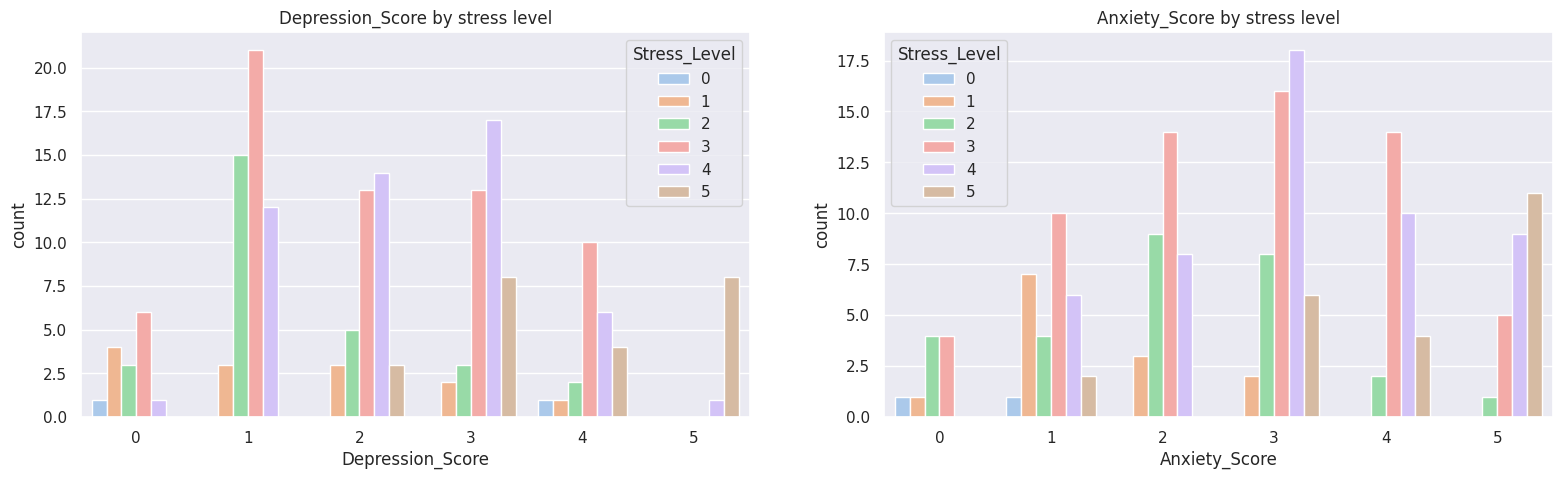

In [ ]:
plt.figure(figsize=(19,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2 , 1)
ax = sns.countplot(x="Depression_Score", hue="Stress_Level", data=df,palette='pastel')
plt.title("Depression_Score by stress level")
plt.subplot(1, 2, 2)
ax = sns.countplot(x="Anxiety_Score", hue="Stress_Level", data=df,palette='pastel')
plt.title("Anxiety_Score by stress level")
plt.show()

1.   **depression_Score and stress level** :

      there is a linear relation between depression_Score and stress level
      higher level of stress(4 , 5) higher depression_Score .
2.   **Anxiety_Score and stress level** :

      has the same relation between depression_Score and stress level ,but more
      strong than depression_Score.

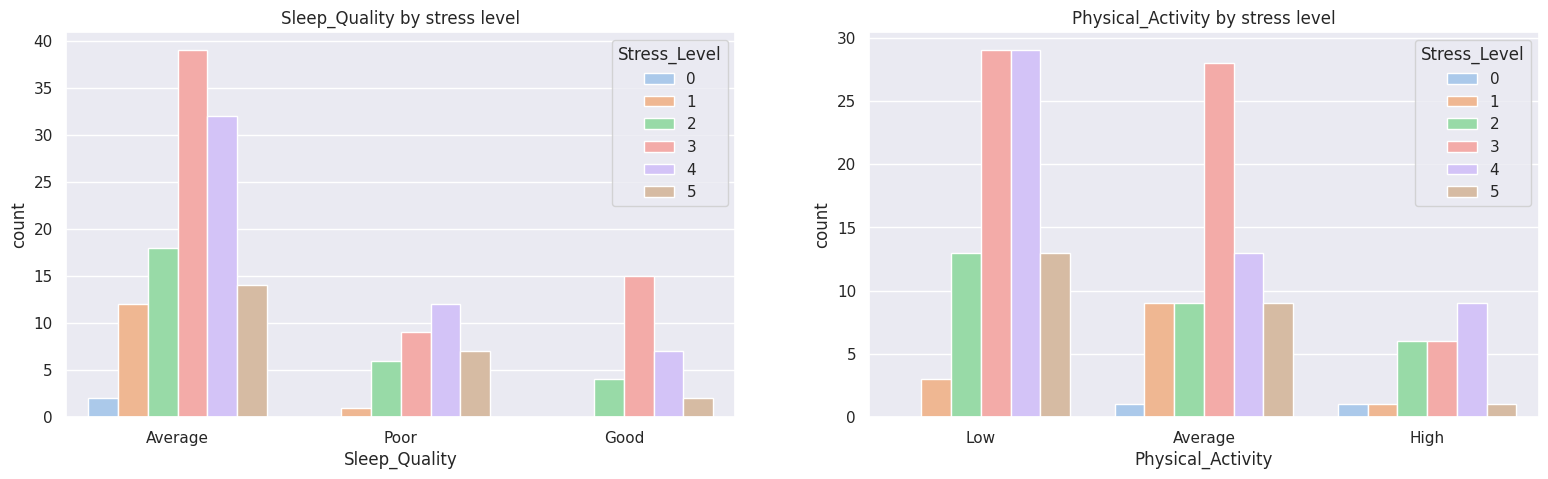

In [ ]:
plt.figure(figsize=(19,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2 , 1)
ax = sns.countplot(x="Sleep_Quality", hue="Stress_Level", data=df,palette='pastel')
plt.title("Sleep_Quality by stress level")
plt.subplot(1, 2, 2)
ax = sns.countplot(x="Physical_Activity", hue="Stress_Level", data=df,palette='pastel')
plt.title("Physical_Activity by stress level")
plt.show()

*   from the first plot we can see that students who have poor sleeping quality has the highest levels of stress  but people who lie in the average tend to have lower stress levels in the avg graph the most occuring level is level 3 but in the poor its level 4 & 5 most of the people who voted poor has no 4 stress level .


*   from the second plot we can see that physical activity has inversly propotional relation with stress people who workout the most tend to have average stress levels of 2 & 3& 4 on the contrary people who don't have relatively high no. of stress level of 5.



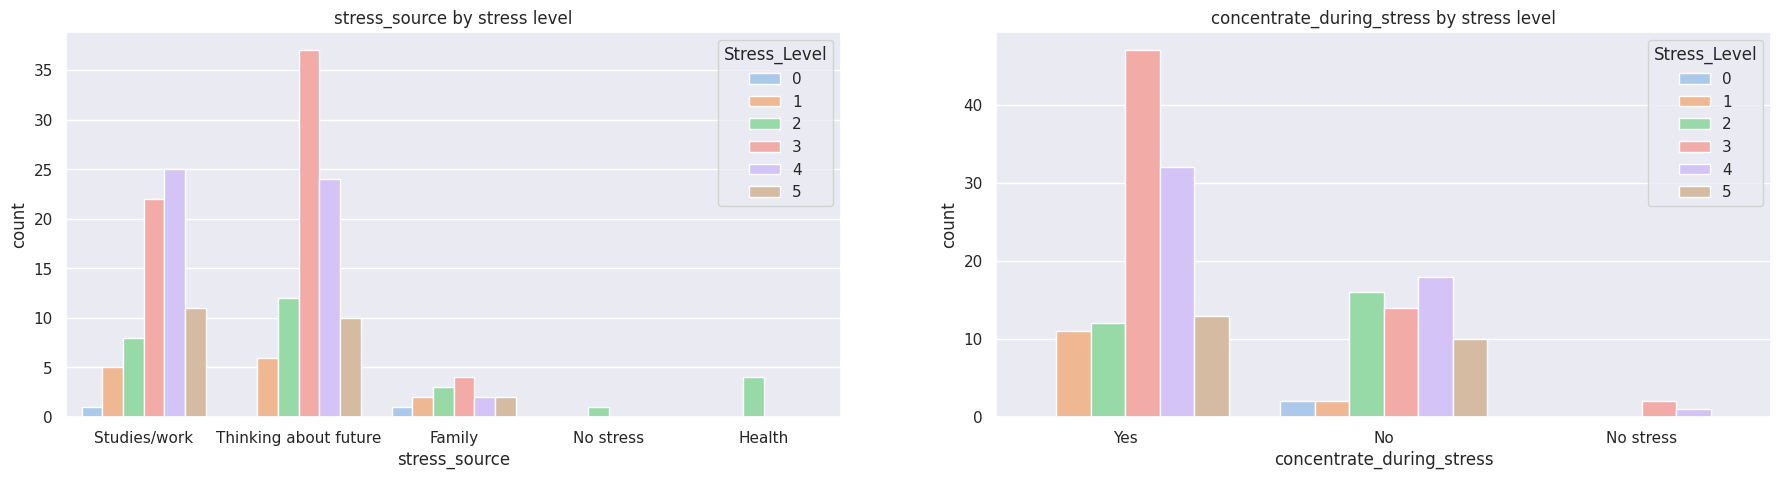

In [ ]:
plt.figure(figsize=(22,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2 , 1)
ax = sns.countplot(x="stress_source", hue="Stress_Level", data=df,palette='pastel')
plt.title("stress_source by stress level")
plt.subplot(1,2 , 2)
ax = sns.countplot(x="concentrate_during_stress", hue="Stress_Level", data=df,palette='pastel')
plt.title("concentrate_during_stress by stress level")
plt.show()

1.   **Stress_Source and stress level** : the most 2 factors that effect in this plot are (Thinking about future , Studies/Work) this is normal , we as students the main stress source comes from working on projects or studies for exams , also thinking about the future especially about jobs and life after graduation, we can also notice that students who are stressed from studies has the leading stress level of 4, but students who suffer from thinking about the future has a peak level of 3 and nearly same count of 4&5 levels as the studies, from which we can conclude that studies can be more stressful than thinking about the future.
2.   **concentrate_during_stress and stress level** :
      we can see that the distribution of students who can't concentrate during stress is left skewed, and the students who can have relatively good distribution..from which we can conclude that high levels of stress can lead students to not concentrate on their work.
      

Text(0.5, 1.0, 'stress_source by concentrate_during_stress')

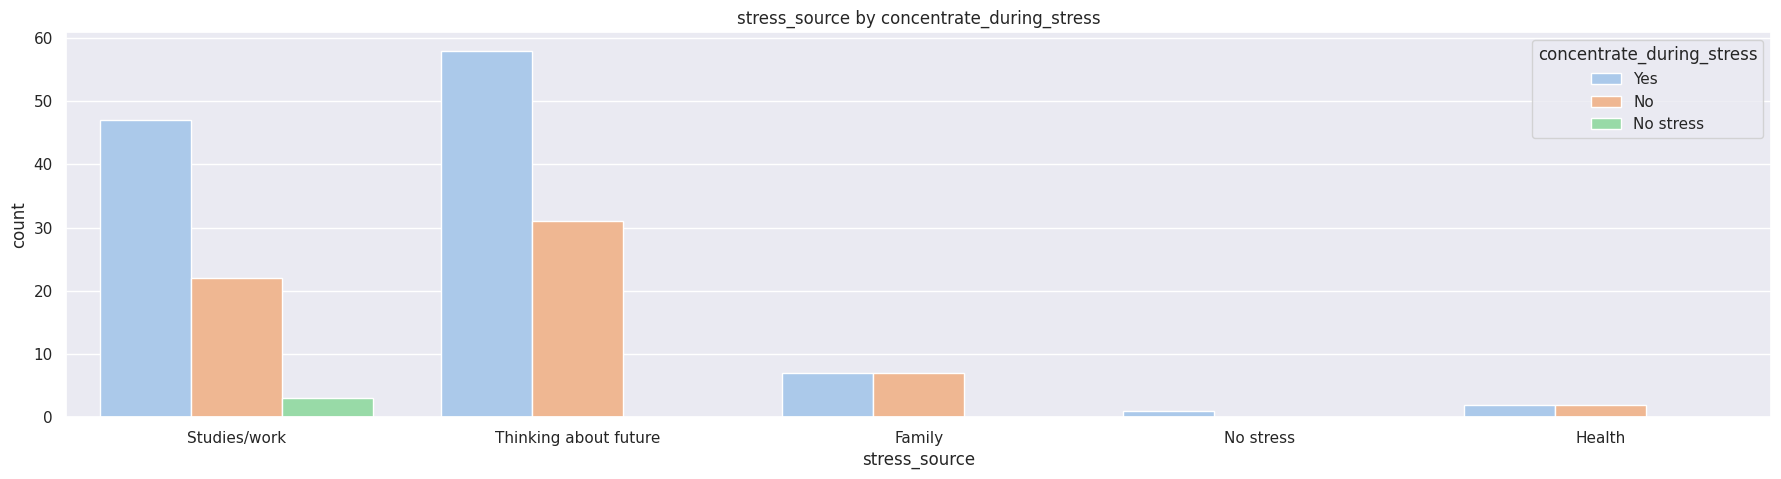

In [ ]:
plt.figure(figsize=(22,5))
sns.set_theme(style="darkgrid")
# plt.subplot(1,2 , 1)
ax = sns.countplot(x="stress_source", hue="concentrate_during_stress", data=df,palette='pastel')
plt.title("stress_source by concentrate_during_stress")

*   in this plot we can see that most students who stress about the future or studies can concentrate during stress it is healthy to think about the future and work hard to get what you dream of on the contrary when stressing about family issues we can see the count is equal which is a huge increase in the number of people who can't concentrate.

In [ ]:
fig = px.histogram(df, x='Depression_Score', color='Depression_Score', title='Distribution of Depression_Scores',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

This data are a little skewed (right skewed) concluding from it that students suffer froom low levels of depression which is a good indicator for their mental health.

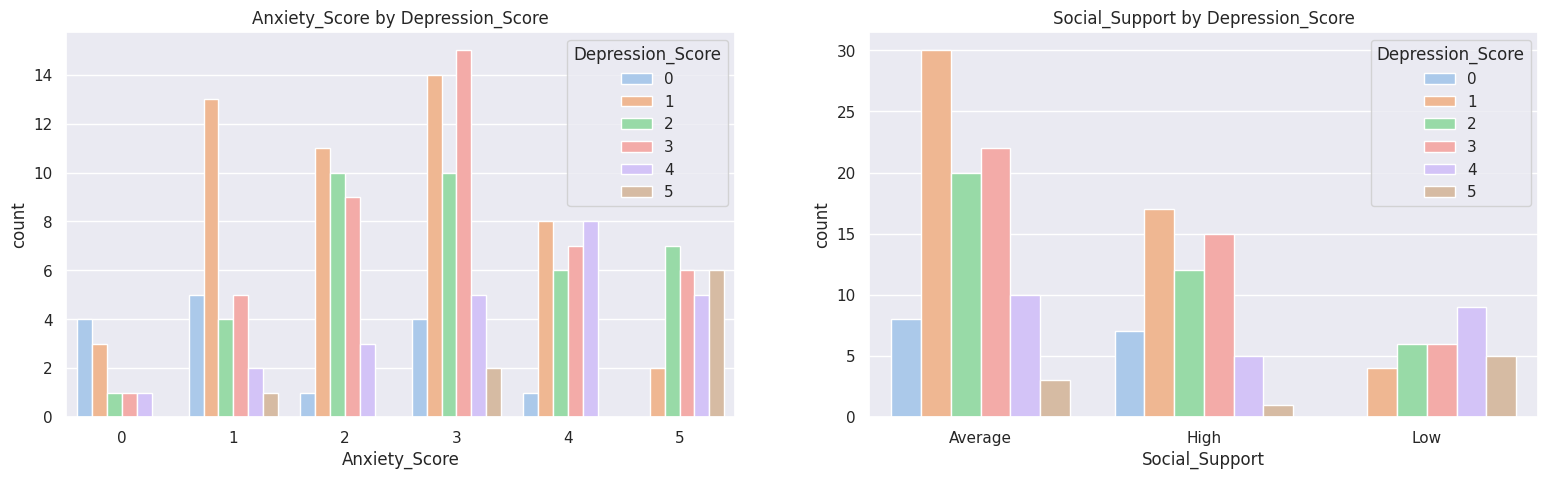

In [ ]:
plt.figure(figsize=(19,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2 , 1)
ax = sns.countplot(x="Anxiety_Score", hue="Depression_Score", data=df,palette='pastel')
plt.title("Anxiety_Score by Depression_Score")
plt.subplot(1, 2, 2)
ax = sns.countplot(x="Social_Support", hue="Depression_Score", data=df,palette='pastel')
plt.title("Social_Support by Depression_Score")
plt.show()

*   from the first plot we can see that students with low anxiety tend to have low depression scores int the first couple of columns we can see that the leading levels are 0 and 1 and the other scores are low as we go through the anxiety score we can see that it gradualy changes and at the end the highest scores are 3,4 and 5.

*   from the second plot we can see that the higher the social support the lower the depression in high support the leading score is 1 ,while in the low the leading score is 4.



In [ ]:
fig = px.histogram(df, x='Anxiety_Score', color='Anxiety_Score', title='Distribution of Anxiety_Scores',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

nearly normal distribution without any skewness.

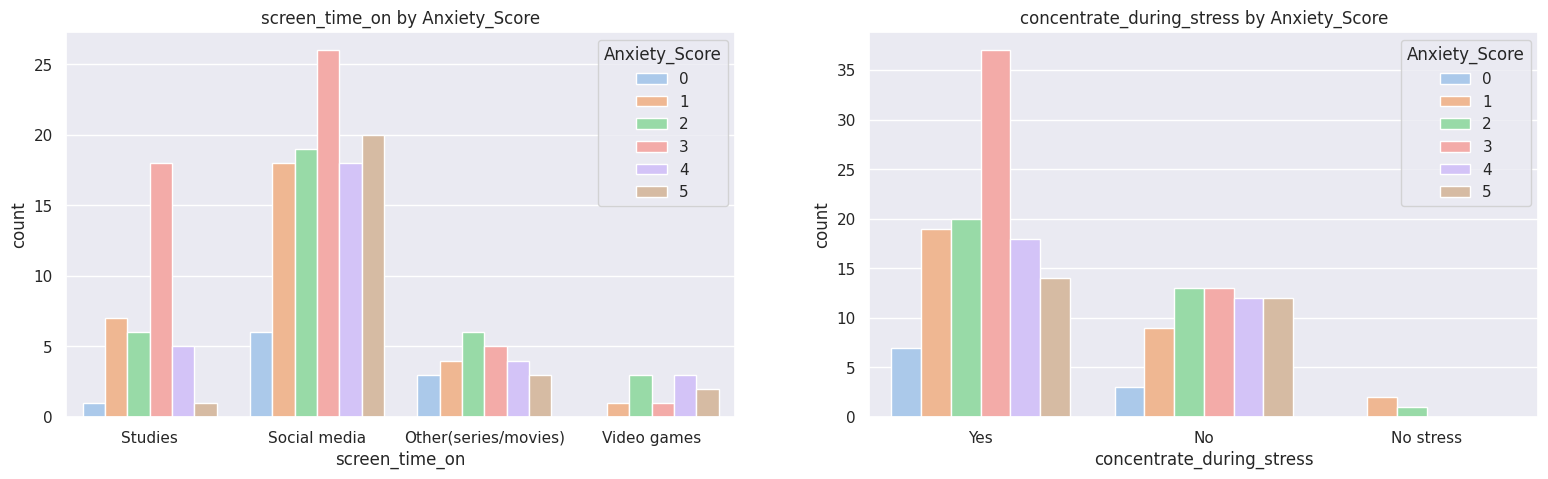

In [ ]:
plt.figure(figsize=(19,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2 , 1)
ax = sns.countplot(x="screen_time_on", hue="Anxiety_Score", data=df,palette='pastel')
plt.title("screen_time_on by Anxiety_Score")
plt.subplot(1, 2, 2)
ax = sns.countplot(x="concentrate_during_stress", hue="Anxiety_Score", data=df,palette='pastel')
plt.title("concentrate_during_stress by Anxiety_Score")
plt.show()

*   from the first plot we can see that students who study has lower avg of anxiety scores,and their distribution is not very skewed, while students who waste their time on social media have high anxiety scores, and their distribution is left skewed which indicates high levels of anxiety, from which we can conclude that social media may has a bad impact on anxiety,and also in some researches that shared in internet found that spending too much time in social media can effect us with harm mental diseases and one of them is (Anxeity) ,  for video games, we can see that anxiety levels 4,5 have higher count than the average(3), which from we can also conclude that video games may have also a bad impact on anxiety.

*   from the second plot we can see that students who can concentrate during stress have low anxiety scores as they tend to get the work done but others who can't tend to overthink the situation and have anxiety as we can see in the plot the leading scores in the people who can concentrate column are 3,2 and 1 but in the other column its 3,4 and 5 that is a much higher anxiety AVG .



In [ ]:
Sleep_Quality_count = df['Sleep_Quality'].value_counts().reset_index()
Sleep_Quality_count.columns = ['Sleep Quality', 'Count']

# Create the bar plot
fig = px.bar(Sleep_Quality_count, x='Sleep Quality', y='Count', title='Sleep Quality and Number of People',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

from the prev plot, we can see that the data is Normal , so most of our students have Average Sleep Quality.    

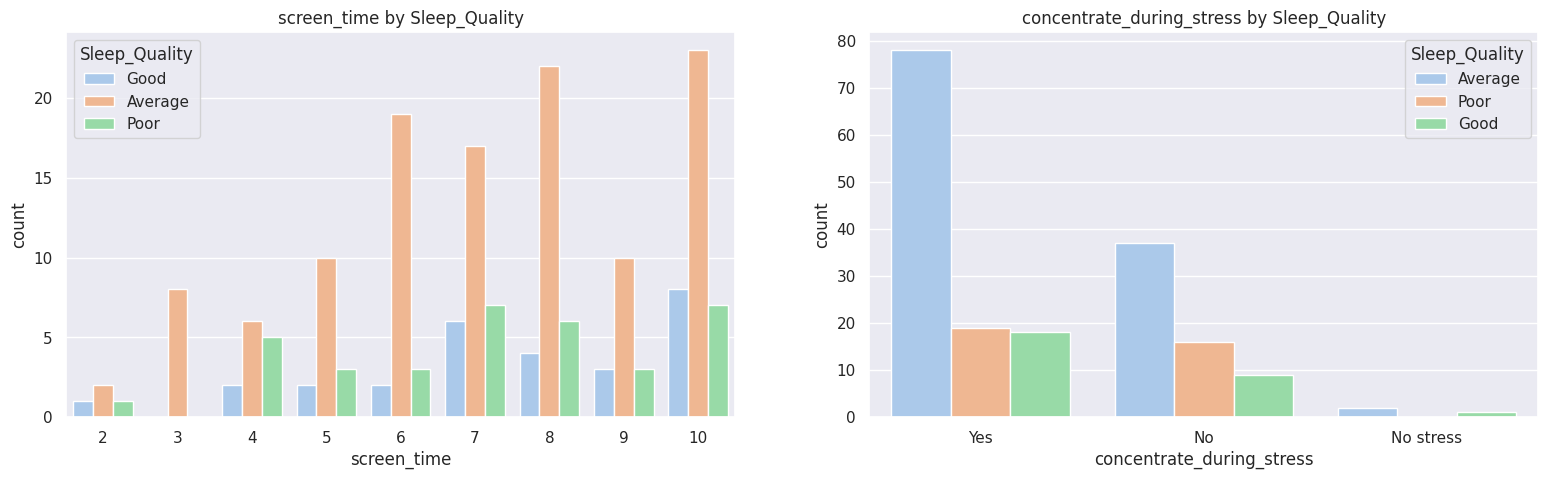

In [ ]:
plt.figure(figsize=(19,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2 , 1)
ax = sns.countplot(x="screen_time", hue="Sleep_Quality", data=df,palette='pastel')
plt.title("screen_time by Sleep_Quality")
plt.subplot(1, 2, 2)
ax = sns.countplot(x="concentrate_during_stress", hue="Sleep_Quality", data=df,palette='pastel')
plt.title("concentrate_during_stress by Sleep_Quality")
plt.show()

*   from the first plot we can see that students who have low screen time have better sleep quality and as the screen time increases the sleep quality decreases but the avg is still the leading score in every level.

*   from the second plot we can see that students who can concentrate during stress have higher sleep quality as we can see from the graph the good and poor are equal but in the case that they can't concentrate the poor is leading the good by almost double the people, also people who have no stress have either good or average sleep quality, but not poor.



In [ ]:
fig = px.histogram(df, x='Physical_Activity', color='Physical_Activity', title='Distribution of Physical_Activities',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

This data seems to be very right skewed as students don't pay attention to physical avtivities.

In [ ]:
fig = px.histogram(df, x='Social_Support', color='Social_Support', title='Distribution of Social_Support',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

nearly normally distributed and the most two leading levels are average and high which indicates that most of the students get good amount of social support.

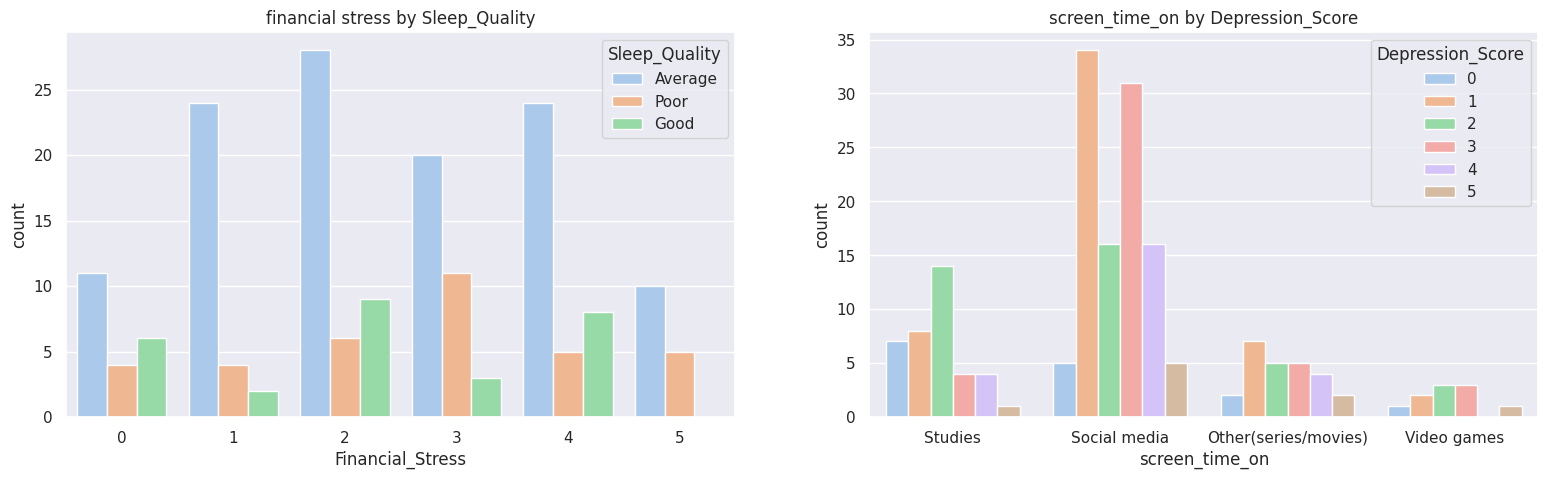

In [ ]:
plt.figure(figsize=(19,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2 , 1)
ax = sns.countplot(x="Financial_Stress", hue="Sleep_Quality", data=df,palette='pastel')
plt.title("financial stress by Sleep_Quality")
plt.subplot(1, 2, 2)
ax = sns.countplot(x="screen_time_on", hue="Depression_Score", data=df,palette='pastel')
plt.title("screen_time_on by Depression_Score")
plt.show()

* from the first plot, as we can see people with level 5 financial stress don't have good sleep as they worry all the time.

* from the second plot we can see that all the distributions can be considered normally distributed, except for the studies is a little bit right skewed which can indicate that people who spend most of their time studying tend to not suffer from high levels of stress.





In [ ]:
fig = px.histogram(df, x='Financial_Stress', color='Financial_Stress', title='Distribution of Financial_Stress',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

as we can see data is good no skewness and also most of the students are in financial stress  level 2 and 4.

In [ ]:
fig = px.histogram(df, x='satisfaction_with_department', color='satisfaction_with_department', title='Distribution of satisfaction_with_department',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

nearly 20% of our students are not satisfied with their departemnt.

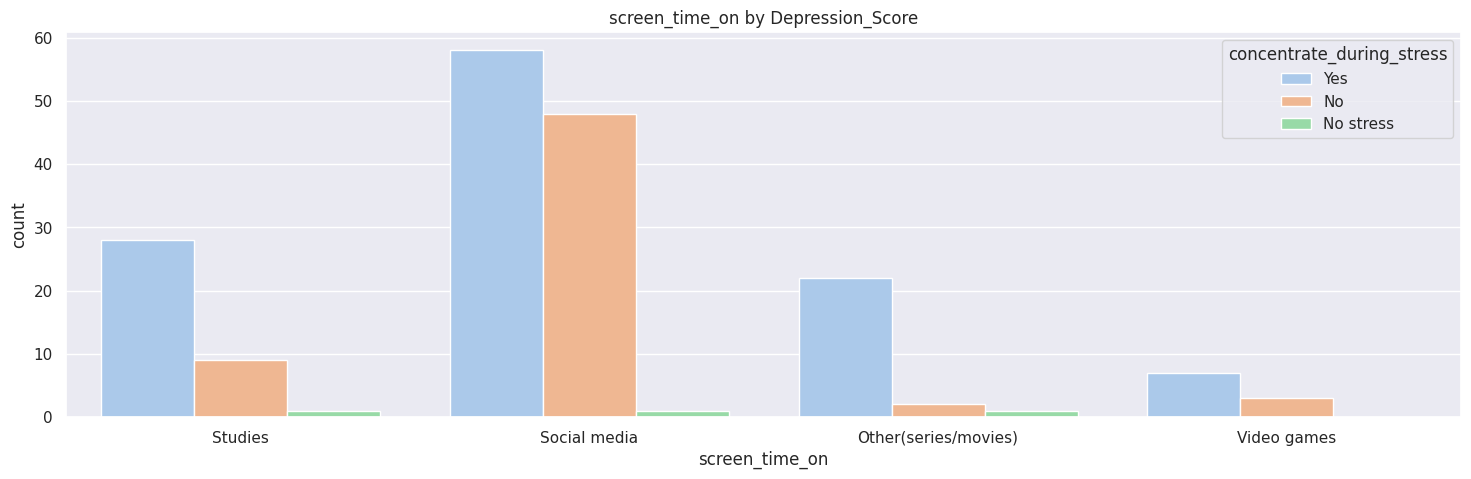

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x="screen_time_on", hue="concentrate_during_stress", data=df,palette='pastel')
plt.title("screen_time_on by Depression_Score")
plt.show()

from the prev. plot we can see clearly that people who spend their screen time on social media have very high rate of students who can't concentrate during stress relative to the other categories..as we can see the ratio between yes and no in studies category is more than 2, but at the social media category it's nearly 1..and from which we can conclude that social media can has very bad impact on students as it can make them not able to concentrate.

# **Credits :**

This notebook is created by [Connect X](https://www.linkedin.com/company/connectx23/)
AI team.

-------------------------------------------

###**Directed by :**

AI team director [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett/)

###**Team leader :**

[Yomna Mohammed Bassam](https://www.linkedin.com/in/yomna-muhammed-bassam-b964a6270)

[Habiba Naser](www.linkedin.com/in/habiba-naser)

###**Team members :**

-[Julia Joseph Nabil](https://www.linkedin.com/in/julia-joseph-b91a85210?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)

-[Ziad Ashraf Ali Ahmed](https://www.linkedin.com/in/ziad-ashraf-93a040255/)


-[David Magdy Nagib](https://www.linkedin.com/in/david-magdy-nagib)

-